In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np 
import matplotlib.pylab as plt
from matplotlib_venn import venn3, venn3_circles

In [11]:
our_color_palette = {"WT": "#F2C14E", # yellow
                     "W": "#F2C14E", # yellow
                     "IP": "#79ADDC", # blue
                     "I": "#79ADDC", # blue
                     "KO": "#B279A7", # purple
                     "K": "#B279A7", # purple
                    } 
treatments_list = ["W", "I", "K"]
passages_list = ["p1", "p2", "p3", "p5", "p10"]
replicates_list = ['a', 'b', 'c']

In [12]:
fname = "all_mutations.annotated.filtered.csv"
df = pd.read_csv(fname)

In [13]:
df['genotype'] = df['file'].str.split("/").str[2].str.split("_").str[0]
df['rep'] = df['file'].str.split("/").str[2].str.split("_").str[2]
df['passage'] = df['file'].str.split("/").str[2].str.split("_").str[1]
df['n_var'] = df['Rvar'] + df['Fvar']
df['n_tot'] = df['Rtot'] + df['Ftot']
df['frequency'] = df['n_var'] / df['n_tot']
df['position'] = df['POS'] 
df['mutation'] = df['REF'] + df['POS'].astype(str) + df['ALT']

In [14]:
df['genotype'].unique()

array(['parental', 'W', 'K', 'I'], dtype=object)

## Venn diagram

## crpv -- replicates

In [15]:
# minimum mutation frequency
freq_thres = 0.01
muts = "NS"
virus = "crpv"

In [16]:
if muts == "NS":
    df_temp = df[df['IsSynonymous']!=0]
else:
    df_temp = df
    
df_venn = df_temp[(df_temp['frequency']>=freq_thres) &(df_temp['virus']==virus) ]

In [17]:
mutations_W_a = set(df_venn[(df_venn['genotype']=="W") & (df_venn['rep']=="a")]["mutation"].to_list())
mutations_W_b = set(df_venn[(df_venn['genotype']=="W") & (df_venn['rep']=="b")]["mutation"].to_list())
mutations_W_c = set(df_venn[(df_venn['genotype']=="W") & (df_venn['rep']=="c")]["mutation"].to_list())

mutations_I_a = set(df_venn[(df_venn['genotype']=="I") & (df_venn['rep']=="a")]["mutation"].to_list())
mutations_I_b = set(df_venn[(df_venn['genotype']=="I") & (df_venn['rep']=="b")]["mutation"].to_list())
mutations_I_c = set(df_venn[(df_venn['genotype']=="I") & (df_venn['rep']=="c")]["mutation"].to_list())

mutations_K_a = set(df_venn[(df_venn['genotype']=="K") & (df_venn['rep']=="a")]["mutation"].to_list())
mutations_K_b = set(df_venn[(df_venn['genotype']=="K") & (df_venn['rep']=="b")]["mutation"].to_list())
mutations_K_c = set(df_venn[(df_venn['genotype']=="K") & (df_venn['rep']=="c")]["mutation"].to_list())

mutations_p0 = set(df_venn[df_venn['genotype']=="parental"]["mutation"].to_list())

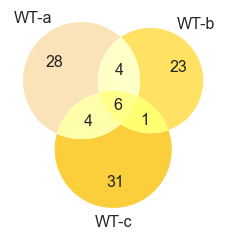

In [18]:
# WT 
wt_colors = ('#fae3b9', '#ffe264', '#fbcf3b')

out = venn3(subsets=[mutations_W_a ,# - mutations_p0, 
               mutations_W_b,# - mutations_p0,
               mutations_W_c ,#- mutations_p0
                    ],
      set_labels=('WT-a', 'WT-b', 'WT-c'),
      set_colors=wt_colors,
      alpha=1, 
     )

for text in out.set_labels:
    text.set_fontsize(16)
for text in out.subset_labels:
    text.set_fontsize(16)

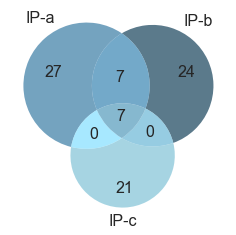

In [19]:
# IP 
ip_colors = ('#3a7ca5', '#16425b', '#81c3d7')

out = venn3(subsets=[mutations_I_a, #- mutations_p0, 
               mutations_I_b, #- mutations_p0,
               mutations_I_c, #- mutations_p0
                    ],
      set_labels=('IP-a', 'IP-b', 'IP-c'),
      set_colors=ip_colors,
      alpha=0.7, 
     )

for text in out.set_labels:
    text.set_fontsize(16)
for text in out.subset_labels:
    text.set_fontsize(16)


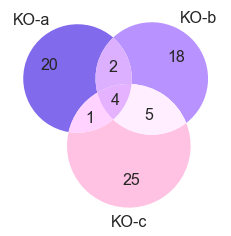

In [20]:
# KO 
ko_colors = ('#826aed', '#b892ff', '#ffc2e2')

out = venn3(subsets=[mutations_K_a ,#- mutations_p0, 
               mutations_K_b ,#- mutations_p0,
               mutations_K_c ,#- mutations_p0
                    ],
      set_labels=('KO-a', 'KO-b', 'KO-c'),
      set_colors=ko_colors,
      alpha=1, 
     )

for text in out.set_labels:
    text.set_fontsize(16)
for text in out.subset_labels:
    text.set_fontsize(16)

## dcv and crpv

In [21]:
# minimum mutation frequency
freq_thres = 0.01

muts_high_freq = df[(df['frequency']>=freq_thres)]['mutation'].unique()
muts = "all"

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_48343/1026156772.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


229
229


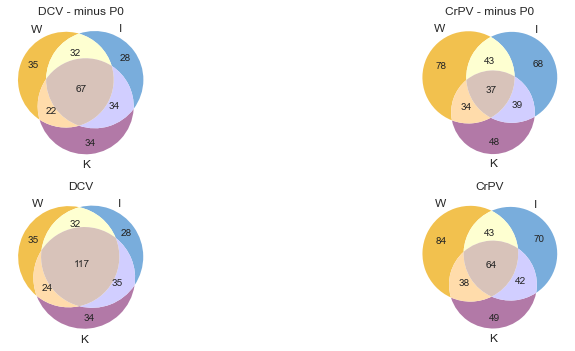

In [25]:
plt.style.use('seaborn')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 5))

if muts == "NS":
    df_temp = df[df['IsSynonymous']!=0]
else:
    df_temp = df
    
df_venn = df_temp[(df_temp['mutation'].isin(muts_high_freq)) &(df_temp['virus']=='dcv') ]

mutations_W = set(df_venn[df_venn['genotype']=="W"]["mutation"].to_list())
mutations_I = set(df_venn[df_venn['genotype']=="I"]["mutation"].to_list())
mutations_K = set(df_venn[df_venn['genotype']=="K"]["mutation"].to_list())
mutations_p0 = set(df_venn[df_venn['genotype']=="parental"]["mutation"].to_list())

# 'wild type', color='#F2C14E'
# 'dicer overexpressed', color='#368F8B'
# 'dicer knockdown', color='#F15BB5'

venn3(subsets=[mutations_W-mutations_p0, 
               mutations_I-mutations_p0,
               mutations_K-mutations_p0],
      set_labels=('W', 'I', 'K'),
      set_colors=('#F2C14E', '#79ADDC', '#B279A7'),
      alpha=1, 
      ax=ax1
     )

ax1.set_title("DCV - minus P0")

df_venn = df_temp[df_temp['mutation'].isin(muts_high_freq) &(df_temp['virus']=='crpv')]

mutations_W = set(df_venn[df_venn['genotype']=="W"]["mutation"].to_list())
mutations_I = set(df_venn[df_venn['genotype']=="I"]["mutation"].to_list())
mutations_K = set(df_venn[df_venn['genotype']=="K"]["mutation"].to_list())
mutations_p0 = set(df_venn[df_venn['genotype']=="parental"]["mutation"].to_list())

# 'wild type', color='#F2C14E'
# 'dicer overexpressed', color='#368F8B'
# 'dicer knockdown', color='#F15BB5'

venn3(subsets=[mutations_W-mutations_p0, 
               mutations_I-mutations_p0,
               mutations_K-mutations_p0
              ], 
      set_labels=('W', 'I', 'K'),
      set_colors=('#F2C14E', '#79ADDC', '#B279A7'),
      alpha=1, 
      ax=ax2,
     )

ax2.set_title("CrPV - minus P0")


df_venn = df_temp[(df_temp['mutation'].isin(muts_high_freq) ) &(df_temp['virus']=='dcv') ]

mutations_W = set(df_venn[df_venn['genotype']=="W"]["mutation"].to_list())
mutations_I = set(df_venn[df_venn['genotype']=="I"]["mutation"].to_list())
mutations_K = set(df_venn[df_venn['genotype']=="K"]["mutation"].to_list())

# 'wild type', color='#F2C14E'
# 'dicer overexpressed', color='#368F8B'
# 'dicer knockdown', color='#F15BB5'

venn3(subsets=[mutations_W, 
               mutations_I,
               mutations_K],
      set_labels=('W', 'I', 'K'),
      set_colors=('#F2C14E', '#79ADDC', '#B279A7'),
      alpha=1, 
      ax=ax3
     )

ax3.set_title("DCV")

df_venn = df_temp[(df_temp['mutation'].isin(muts_high_freq) ) &(df_temp['virus']=='crpv')]

mutations_W = set(df_venn[df_venn['genotype']=="W"]["mutation"].to_list())
print(len(mutations_W))
print(len(set(mutations_W)))

mutations_I = set(df_venn[df_venn['genotype']=="I"]["mutation"].to_list())
mutations_K = set(df_venn[df_venn['genotype']=="K"]["mutation"].to_list())

# 'wild type', color='#F2C14E'
# 'dicer overexpressed', color='#368F8B'
# 'dicer knockdown', color='#F15BB5'

venn3(subsets=[mutations_W, 
               mutations_I,
               mutations_K
              ], 
      set_labels=('W', 'I', 'K'),
      set_colors=('#F2C14E', '#79ADDC', '#B279A7'),
      alpha=1, 
      ax=ax4,
     )

ax4.set_title("CrPV")

fig.tight_layout()

#fig.savefig(f"/Users/lfuhrmann/Downloads/oscar_update/venn_diagramm_freq{freq_thres}_{muts}.pdf")

## with mutation annotations



/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_3730/2350763989.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


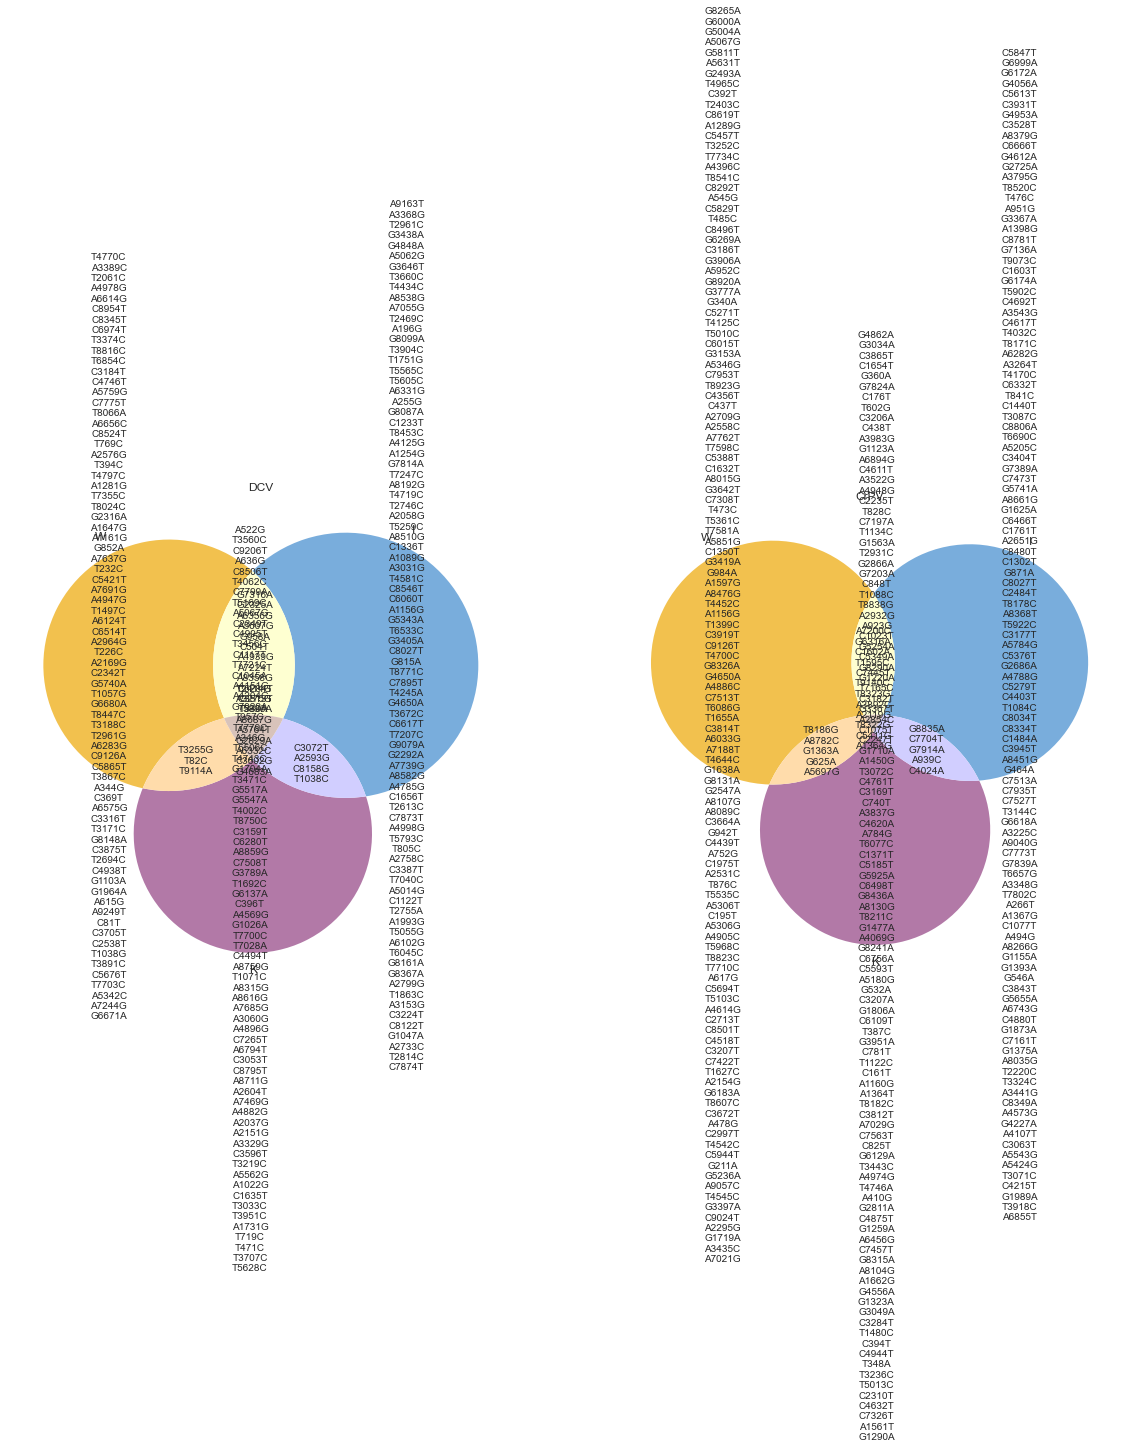

In [16]:
freq_thres = 0.01


plt.style.use('seaborn')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

df_venn = df[(df['frequency']>=freq_thres) &(df['virus']=='dcv')]

mutations_W = set(df_venn[df_venn['genotype']=="W"]["mutation"].to_list())
mutations_I = set(df_venn[df_venn['genotype']=="I"]["mutation"].to_list())
mutations_K = set(df_venn[df_venn['genotype']=="K"]["mutation"].to_list())
mutations_p0 = set(df_venn[df_venn['genotype']=="parental"]["mutation"].to_list())

# 'wild type', color='#F2C14E'
# 'dicer overexpressed', color='#368F8B'
# 'dicer knockdown', color='#F15BB5'

venn = venn3(subsets=[mutations_W-mutations_p0, 
               mutations_I-mutations_p0,
               mutations_K-mutations_p0], 
      set_labels=('W', 'I', 'K'),
      set_colors=('#F2C14E', '#79ADDC', '#B279A7'),
      alpha=1, 
      ax=ax1
     )

ax1.set_title("DCV")

set1= mutations_W-mutations_p0
set2=mutations_I-mutations_p0
set3=mutations_K-mutations_p0

venn.get_label_by_id('100').set_text('\n'.join(set1-set2-set3))
venn.get_label_by_id('110').set_text('\n'.join(set1&set2-set3))
venn.get_label_by_id('010').set_text('\n'.join(set2-set3-set1))
venn.get_label_by_id('101').set_text('\n'.join(set1&set3-set2))
venn.get_label_by_id('111').set_text('\n'.join(set1&set2&set3))
venn.get_label_by_id('011').set_text('\n'.join(set2&set3-set1))
venn.get_label_by_id('001').set_text('\n'.join(set3-set2-set1))


df_venn = df[(df['frequency']>=freq_thres) &(df['virus']=='crpv')]

mutations_W = set(df_venn[df_venn['genotype']=="W"]["mutation"].to_list())
mutations_I = set(df_venn[df_venn['genotype']=="I"]["mutation"].to_list())
mutations_K = set(df_venn[df_venn['genotype']=="K"]["mutation"].to_list())
mutations_p0 = set(df_venn[df_venn['genotype']=="parental"]["mutation"].to_list())


# 'wild type', color='#F2C14E'
# 'dicer overexpressed', color='#368F8B'
# 'dicer knockdown', color='#F15BB5'

venn = venn3(subsets=[mutations_W-mutations_p0, 
               mutations_I-mutations_p0,
               mutations_K-mutations_p0], 
      set_labels=('W', 'I', 'K'),
      set_colors=('#F2C14E', '#79ADDC', '#B279A7'),
      alpha=1, 
      ax=ax2,
     )

ax2.set_title("CrPV")

set1= mutations_W-mutations_p0
set2=mutations_I-mutations_p0
set3=mutations_K-mutations_p0

venn.get_label_by_id('100').set_text('\n'.join(set1-set2-set3))
venn.get_label_by_id('110').set_text('\n'.join(set1&set2-set3))
venn.get_label_by_id('010').set_text('\n'.join(set2-set3-set1))
venn.get_label_by_id('101').set_text('\n'.join(set1&set3-set2))
venn.get_label_by_id('111').set_text('\n'.join(set1&set2&set3))
venn.get_label_by_id('011').set_text('\n'.join(set2&set3-set1))
venn.get_label_by_id('001').set_text('\n'.join(set3-set2-set1))



#fig.show()
fig.savefig(f"/Users/lfuhrmann/Downloads/oscar_update/venn_diagramm_freq0.01_muts_minusP0.pdf")

## only non-synonuoums

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_3730/116279371.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


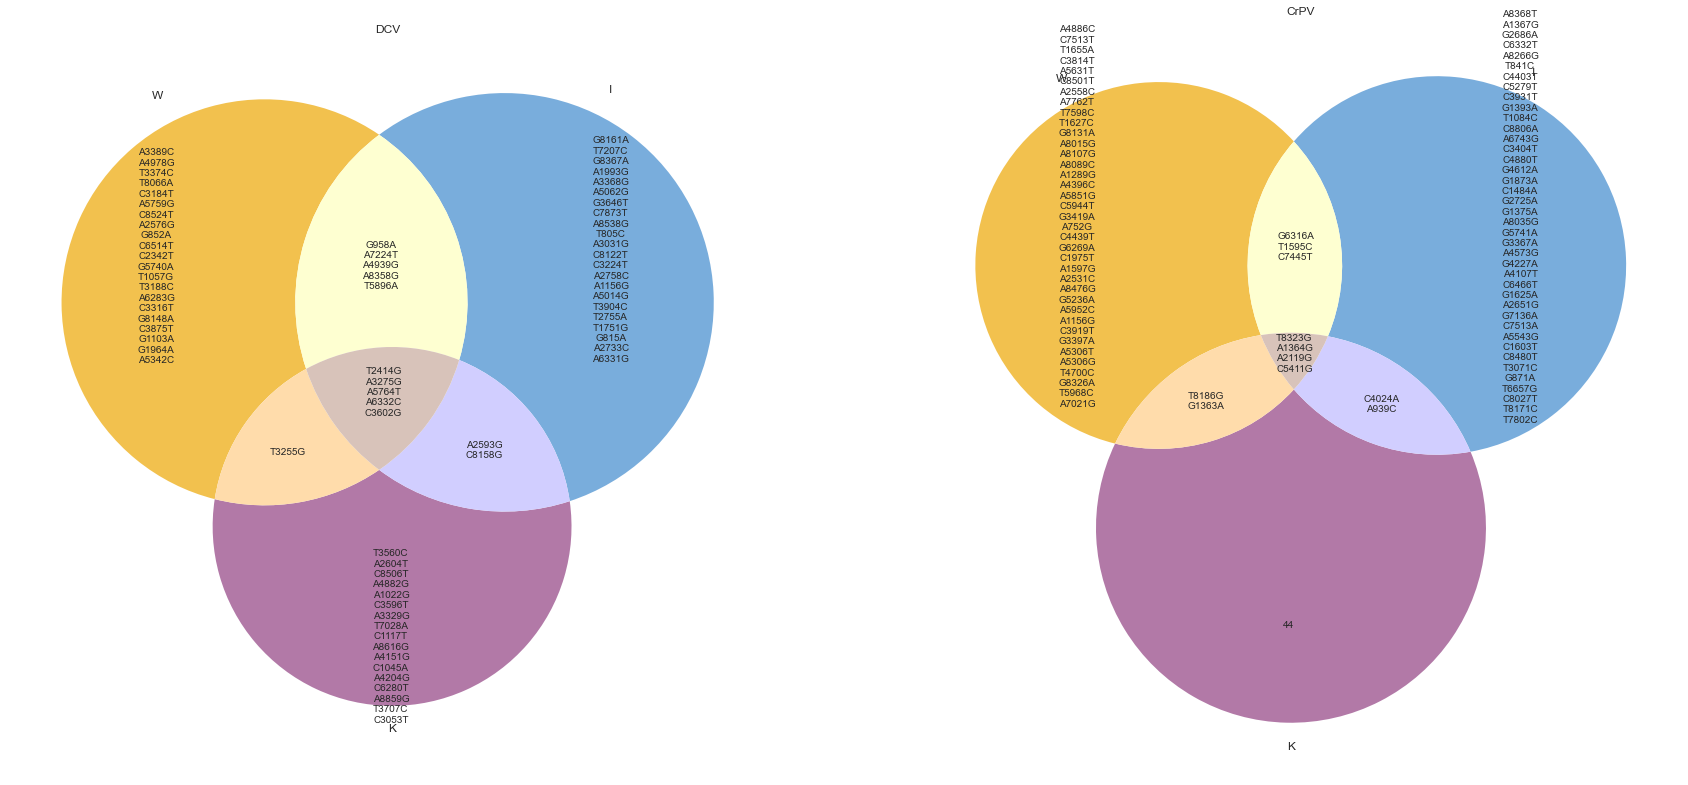

In [18]:
freq_thres = 0.01

df = df[df['IsSynonymous']==0]

plt.style.use('seaborn')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 20))

df_venn = df[(df['frequency']>=freq_thres) &(df['virus']=='dcv')]

mutations_W = set(df_venn[df_venn['genotype']=="W"]["mutation"].to_list())
mutations_I = set(df_venn[df_venn['genotype']=="I"]["mutation"].to_list())
mutations_K = set(df_venn[df_venn['genotype']=="K"]["mutation"].to_list())
mutations_p0 = set(df_venn[df_venn['genotype']=="parental"]["mutation"].to_list())


# 'wild type', color='#F2C14E'
# 'dicer overexpressed', color='#368F8B'
# 'dicer knockdown', color='#F15BB5'

venn = venn3(subsets=[mutations_W-mutations_p0,
                      mutations_I-mutations_p0,
                      mutations_K-mutations_p0], 
      set_labels=('W', 'I', 'K'),
      set_colors=('#F2C14E', '#79ADDC', '#B279A7'),
      alpha=1, 
      ax=ax1
     )

ax1.set_title("DCV")

set1= mutations_W-mutations_p0
set2=mutations_I-mutations_p0
set3=mutations_K-mutations_p0

venn.get_label_by_id('100').set_text('\n'.join(set1-set2-set3))
venn.get_label_by_id('110').set_text('\n'.join(set1&set2-set3))
venn.get_label_by_id('010').set_text('\n'.join(set2-set3-set1))
venn.get_label_by_id('101').set_text('\n'.join(set1&set3-set2))
venn.get_label_by_id('111').set_text('\n'.join(set1&set2&set3))
venn.get_label_by_id('011').set_text('\n'.join(set2&set3-set1))
venn.get_label_by_id('001').set_text('\n'.join(set3-set2-set1))


df_venn = df[(df['frequency']>=freq_thres) &(df['virus']=='crpv')]

mutations_W = set(df_venn[df_venn['genotype']=="W"]["mutation"].to_list())
mutations_I = set(df_venn[df_venn['genotype']=="I"]["mutation"].to_list())
mutations_K = set(df_venn[df_venn['genotype']=="K"]["mutation"].to_list())
mutations_p0 = set(df_venn[df_venn['genotype']=="parental"]["mutation"].to_list())


# 'wild type', color='#F2C14E'
# 'dicer overexpressed', color='#368F8B'
# 'dicer knockdown', color='#F15BB5'

venn = venn3(subsets=[mutations_W-mutations_p0,
                      mutations_I-mutations_p0,
                      mutations_K-mutations_p0], 
      set_labels=('W', 'I', 'K'),
      set_colors=('#F2C14E', '#79ADDC', '#B279A7'),
      alpha=1, 
      ax=ax2,
     )

ax2.set_title("CrPV")

set1= mutations_W-mutations_p0
set2=mutations_I-mutations_p0
set3=mutations_K-mutations_p0

venn.get_label_by_id('100').set_text('\n'.join(set1-set2-set3))
venn.get_label_by_id('110').set_text('\n'.join(set1&set2-set3))
venn.get_label_by_id('010').set_text('\n'.join(set2-set3-set1))
venn.get_label_by_id('101').set_text('\n'.join(set1&set3-set2))
venn.get_label_by_id('111').set_text('\n'.join(set1&set2&set3))
venn.get_label_by_id('011').set_text('\n'.join(set2&set3-set1))
#venn.get_label_by_id('001').set_text('\n'.join(set3-set2-set1))



#fig.show()
fig.savefig(f"/Users/lfuhrmann/Downloads/oscar_update/venn_diagramm_freq0.1_NS_muts.pdf")